In [181]:
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [182]:
X, Y = loadlocal_mnist(images_path='train-images.idx3-ubyte', 
                        labels_path='train-labels.idx1-ubyte')
X=X/255

X=X.transpose()
X=X[:,:2048]
Y=Y[:2048]
print("Dimensions of X = " + str(X.shape))
print("Dimensions of Y = " + str(Y.shape)) 

Dimensions of X = (784, 2048)
Dimensions of Y = (2048,)


In [183]:
training_labels=[]
for i in range(0,len(Y)):
    label = [0,0,0,0,0,0,0,0,0,0]
    label[Y[i]]=label[Y[i]]+1
    training_labels.append(label)
training_labels = np.array(training_labels)

In [184]:
training_labels=training_labels.transpose()
print(training_labels.shape)

(10, 2048)


In [185]:
def initialize_parameters(n_x,n_h1,n_h2,n_y):
    
    W1 = np.random.randn(n_h1,n_x)*(2/np.sqrt(n_x))
    b1 = np.zeros(shape=(n_h1,1))*(2/n_x)
    
    W2 = np.random.randn(n_h2,n_h1)*(2/np.sqrt(n_h1))
    b2 = np.zeros(shape=(n_h2,1))*(2/n_h1)
    
    W3 = np.random.randn(n_y,n_h2)*(2/np.sqrt(n_h2))
    b3 = np.zeros(shape=(n_y,1))*(2/n_h2)
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2,
                  "W3":W3,
                  "b3":b3}
    return(parameters)

def softmax(z):
    t=np.exp(z-np.max(z))
    a=t/t.sum(axis=0, keepdims=True)
    return(np.float128(a))

def sigmoid(z):
    s=1/(1+np.exp(-z))
    return(np.float128(s))

In [186]:
def forward_prop(parameters, X):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1=np.dot(W1,X)+b1
    A1=sigmoid(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
    Z3=np.dot(W3,A2)+b3
    A3=softmax(Z3)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return A3, cache

In [187]:
def back_prop(cache, parameters, x, training_labels):
    
    m = x.shape[1]
    
    A3 = cache['A3']
    A2 = cache['A2']
    A1 = cache['A1']

    Z3 = cache['Z3']
    Z2 = cache['Z2']
    Z1 = cache['Z1']

    w1 = parameters['W1']
    w2 = parameters['W2']
    w3 = parameters['W3']
   
    lambd = 10
    dz3 = A3 - training_labels
    dw3 = 1/m * np.dot(dz3, A2.T)
    db3 = 1/m * np.sum(dz3, axis=1, keepdims=True)
    
    da2 = np.dot(w3.T, dz3)
    dz2 = da2*sigmoid(Z2)*(1-sigmoid(Z2))
    dw2 = 1/m*np.dot(dz2, A1.T)
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    
    da1 = np.dot(w2.T, dz2)
    dz1 = da1*sigmoid(Z1)*(1-sigmoid(Z1))
    dw1 = 1/m*np.dot(dz1, x.T)
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    
    derivatives =  {"dW1": dw1,
                  "db1": db1,
                  "dW2": dw2,
                  "db2": db2,
                  "dW3": dw3,
                  "db3": db3}
    return derivatives

In [188]:
def gradient_desc(parameters, derivatives, alpha):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    dw3 = derivatives['dW3']
    db3 = derivatives['db3']
    dw2 = derivatives['dW2']
    db2 = derivatives['db2']
    dw1 = derivatives['dW1']
    db1 = derivatives['db1']
    
    W1 = W1 - alpha*dw1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dw2
    b2 = b2 - alpha*db2
    W3 = W3 - alpha*dw3
    b3 = b3 - alpha*db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

In [189]:
def cost_func(A3, y,m, parameters):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']

    loss_sum = np.sum(np.multiply(y, np.log(A3 + 0.0000001)))
    m = y.shape[1]
    loss = -1/m * loss_sum
    return loss

In [190]:
def create_mini_batches(x, y, batch_size, seed):
    
    np.random.seed(seed)
    mini_batches = [] 
    m = x.shape[1]
    n_minibatches = math.floor(m/batch_size)
    i = 0
    
    permutation = list(np.random.permutation(m))
    shuffled_X = x[:, permutation]
    shuffled_Y = y[:, permutation].reshape((10,m))

    for k in range(0,n_minibatches): 
        mini_batch_X = shuffled_X[:, k*batch_size : (k+1)*batch_size]
        mini_batch_Y = shuffled_Y[:, k*batch_size : (k+1)*batch_size]
    
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    if m % batch_size != 0:
        mini_batch_X = shuffled_X[:,n_minibatches * batch_size:]
        mini_batch_Y = shuffled_Y[:,n_minibatches * batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch) 
        
    return mini_batches

In [191]:
def initialize_adam(parameters) :
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
  
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
    
    return v, s

In [192]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon):

    L = len(parameters)//2                   
    v_corrected = {}                         
    s_corrected = {}                         
    
    for l in range(L):
        
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
        
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - beta1**t)
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - beta1**t)
        
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * grads['dW' + str(l + 1)]**2
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * grads['db' + str(l + 1)]**2
        
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - beta2**t)
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - beta2**t)
        
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)]/ (np.sqrt(s_corrected["dW" + str(l + 1)]) + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / (np.sqrt(s_corrected["db" + str(l + 1)]) + epsilon)

    return parameters, v, s

In [193]:
def update_parameters_with_momentum(parameters, grads, v, alpha, beta):

    L=len(parameters)//2

    for l in range(L):
        
        v["dW" + str(l + 1)] = beta * v["dW" + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta * v["db" + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]

        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - alpha*v["dW" + str(l + 1)]
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - alpha*v["dW" + str(l + 1)]
    
    return parameters,v

Cost after iteration 0: 1.683354
Cost after iteration 10: 0.432766
Cost after iteration 20: 0.211084
Cost after iteration 30: 0.062133
Cost after iteration 40: 0.100119
Cost after iteration 50: 0.039299
Cost after iteration 60: 0.012998
Cost after iteration 70: 0.017970
Cost after iteration 80: 0.005476
Cost after iteration 90: 0.004544


<function matplotlib.pyplot.show(close=None, block=None)>

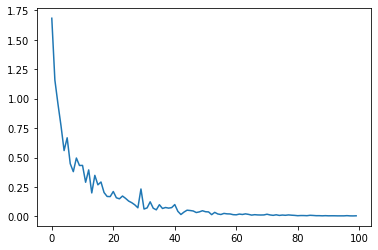

In [194]:
n_x = X.shape[0]
m = X.shape[1]
n_h1 = 128
n_h2 = 64
n_y = 10

t=0
seed=0
costs=[]
epoches = 100

parameters = initialize_parameters(n_x,n_h1,n_h2,n_y)

v, s = initialize_adam(parameters)
alpha = 0.001
for i in range(epoches):

    mini_batches = create_mini_batches(X, training_labels, 64, seed)
    seed=seed+1
    for mini_batch in mini_batches:
    
        X_mini, y_mini = mini_batch 
        A3, cache = forward_prop(parameters, X_mini)

        cost = cost_func(A3,y_mini,m, parameters)

        derivatives = back_prop(cache, parameters, X_mini, y_mini)

        t=t+1
        parameters, v, s = update_parameters_with_adam(parameters, derivatives, v, s, t, alpha, 0.9, 0.999,  1e-8)

    costs.append(cost)

    if i % 10 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

plt.plot(list(range(epoches)), costs)
plt.imshow
plt.show

In [195]:
def accuracy(final, initial):
    for i,label in enumerate(final.T):
        max_idx = np.argmax(label)
        label=np.zeros(len(label))
        label[max_idx]=1
        final.T[i]=label
        
    ret = float(sum(sum((np.multiply(initial,final)))))/float(initial.shape[1])*100
    return ret, final

In [196]:
A4,cache = forward_prop(parameters, X)
value, labels = accuracy(A4, training_labels)
print('Accuracy = '+str(value)+'%') 

Accuracy = 100.0%


Test Set

In [197]:
test_x, test_y = loadlocal_mnist(images_path='t10k-images.idx3-ubyte', labels_path='t10k-labels.idx1-ubyte')

In [198]:
test_x=test_x.transpose()
print("Dimensions of X = " + str(test_x.shape))
print("Dimensions of Y = " + str(test_y.shape)) 

Dimensions of X = (784, 10000)
Dimensions of Y = (10000,)


In [199]:
test_labels=[]
for i in range(0,10000):
    label = [0,0,0,0,0,0,0,0,0,0]
    label[test_y[i]]=label[test_y[i]]+1
    test_labels.append(label)
test_labels = np.array(test_labels)


In [200]:
test_labels=test_labels.transpose()
print(training_labels.shape)

(10, 2048)


In [201]:
A3_test, cache = forward_prop(parameters, test_x)
value, labels = accuracy(A3_test, test_labels)
print('Accuracy = '+str(value)+'%')

Accuracy = 90.39%


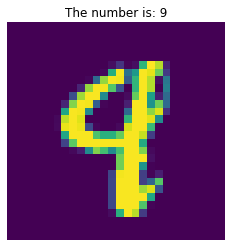

In [202]:
index=random.randint(0,len(test_x))
    
image = test_x.T[index]
image=image.reshape(28,28)
digit = np.argmax(labels.T[index])
    
plt.title("The number is: "+str(digit))
plt.imshow(image)
plt.axis('off')
plt.show()